In [ ]:
dict(
    author="Rob Stenson",
    title="Text",
    date="11/29/2022"
)

In [1]:
#hide-publish
%pip install -q "coldtype[notebook]"
#!pip install -q "coldtype[notebook] @ git+https://github.com/goodhertz/coldtype"

from coldtype.notebook import *

A few common variables we’ll be using throughout:

In [2]:
r = Rect(1000, 250)
co = Font.ColdtypeObviously()

## Basic Text

Let’s start with a simple "Hello World", except in this case, let’s just say COLDTYPE, because the coldtype repository has a special version of the font Obviously that just has those letters (CDELOPTY).


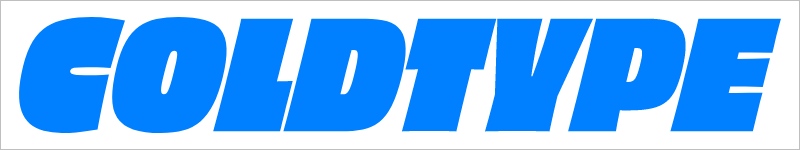

In [7]:
@renderable((800, 150))
def text1(r):
    return StSt("COLDTYPE", co, 150).align(r)

You might be wondering why the text is blue — that’s the default fill color for any text in coldtype. Let’s mess with the color and set some variable font axis values:


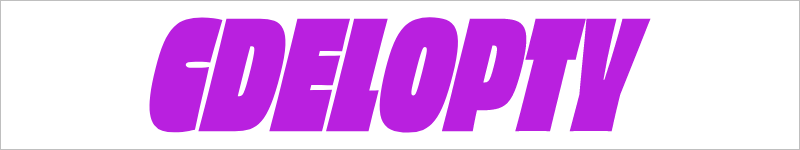

In [8]:
@renderable((800, 150))
def text2(r):
    return (StSt("CDELOPTY", co, 150, wdth=0.5)
        .f(hsl(0.8, s=0.75))
        .align(r))

Also let’s track out the letters and rotate them.


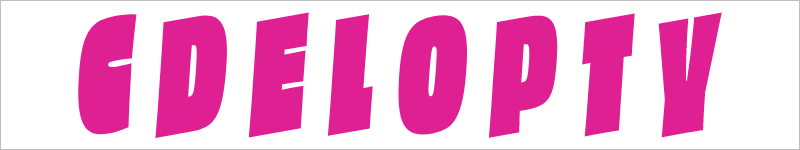

In [9]:
@renderable((800, 150))
def text3(r):
    return (StSt("CDELOPTY", co, 150
        , wdth=0.5
        , rotate=10
        , tu=150)
        .f(hsl(0.9, s=0.75))
        .align(r))

What’s interesting (and different) about setting text with Coldtype is that you aren’t telling the computer to draw text, you’re asking for information about the individual glyphs and where they sit, given the parameters you’re passing into `StSt` function.

Put another way, what you get back from calling (`StSt`...) is a rich set of data that can be inspected and manipulated.


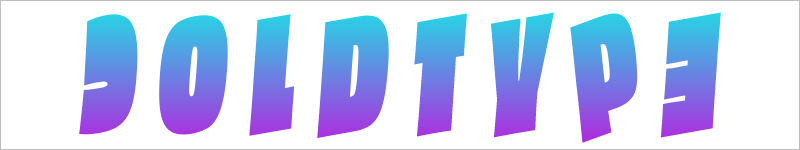

In [11]:
@renderable((800, 150))
def text4(r):
    pens = (StSt("COLDTYPE", co, 150,
        wdth=0.5, rotate=10, tu=150)
        .f(Gradient.Vertical(r,
            hsl(0.5, s=0.8),
            hsl(0.8, s=0.75)))
        .align(r))

    pens[0].rotate(180)
    pens[-1].rotate(180)
    pens[-2].rotate(10)
    return pens


 <®:P:/4...>
 - <®:P:RecordingPen(12mvs) {frame=Rect(205.08,18.75,93.45,112.50),glyphName=C}>
 - <®:P:RecordingPen(12mvs) {frame=Rect(298.53,18.75,110.70,112.50),glyphName=O}>
 - <®:P:RecordingPen(12mvs) {frame=Rect(409.23,18.75,70.65,112.50),glyphName=L}>
 - <®:P:RecordingPen(18mvs) {frame=Rect(479.88,18.75,108.15,112.50),glyphName=D}>



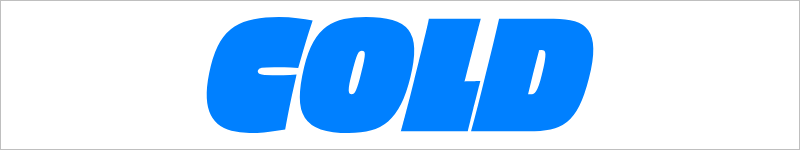

In [12]:
@renderable((800, 150))
def text_print(r):
    pens = (StSt("COLD", co, 150).align(r))
    print(pens.tree()) # <<< printing here
    return pens

### _An aside_

Just for fun, here’s a more coldtype-y way to do that last manipulation: rather than declare a variable `pens` and then manipulate it in a line-wise fashion (`pens[0].rotate...`), you can use functions built-in to the `P` class to manipulate the form without leaving the "chain" (that is, the chained expression).

So the keys here are the lines `.indices` and `.index`, which target elements of the tree (using standard python-style indexing), and then give you the opportunity to do anything you'd like in a lambda. So in just one line, we can rotate both the `C` (index 0) and the `E` (index -1) with a single lambda (i.e. a function that, in this case, is called for each index).

Also we can change the colors since who wants to see the same colors again.


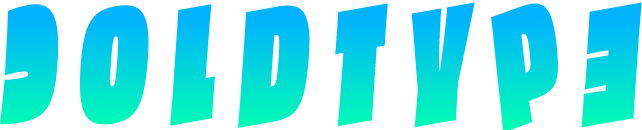

<®:P:/8...>

In [8]:
(StSt("COLDTYPE", co, 150,
    wdth=0.5, rotate=10, tu=150)
    .indices([0, -1], lambda p: p.rotate(180))
    .index(-2, lambda p: p.rotate(10))
    .ch(lambda p: p
        .f(Gradient.V(p.ambit(),
            hsl(0.55, 1),
            hsl(0.45, 1)))))

### Debugging

To see a tree-like representation of the vector/text data, try something like this:

## Less Basic Text

Usually, glyph-wise structured representation of text is not a feature of software or software libraries, because when programmers sit down to implement support for text, they do it with the understanding that if you want text, you probably want a _lot_ of text — great big slabs of it, set in large blocks, like this paragraph that you’re reading now.

But for lots of graphic design (particularly animation), what you actually want is very precise control over only a few glyphs, maybe a line or two. That was some of the magic of technologies like moveable type, or especially Letraset; they gave designers direct control over letterforms. A lot like when you hit “Convert to Outlines” in Illustrator today.

Of course, there’s a big downside to converting-to-outlines: it is excruciatingly slow. And more than that, even when you’re working with just a few letters, you might need to change those letters at the last minute, right before a project is due.

Which is where code really shines. All the manipulations I’ve done so far are not “one-way” or “destructive” (like Convert to Outlines). As far as we’re concerned, the “textbox” (so to speak) is still intact: `StSt("COLDTYPE"...`

To illustrate that point, let’s change the text:


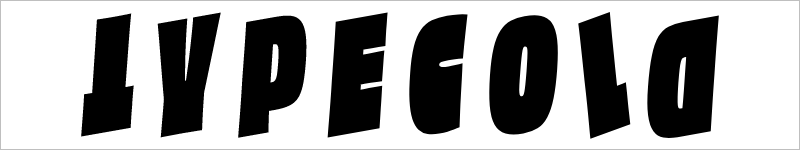

In [14]:
@renderable((800, 150))
def text_rotations(r):
    pens = (StSt("TYPECOLD", co, 150,
        wdth=0.5, rotate=10, tu=150)
        .f(0)
        .align(r))

    pens[0].rotate(180)
    pens[-1].rotate(180)
    pens[-2].rotate(10)
    return pens

The last two examples also illustrate something important about Coldtype: (almost) everything is mutable/self-changing by default. So a line like `pens[0].rotate(180)` changes `pens[0]` directly, meaning you don’t need to assign it to a new variable. This makes it very easy to directly manipulate nested structures without needing to reassign variables.

This also means that sometimes it is very necessary to copy pens in order to double them, so you can make changes to a copy without modifying the original. 

For instance:


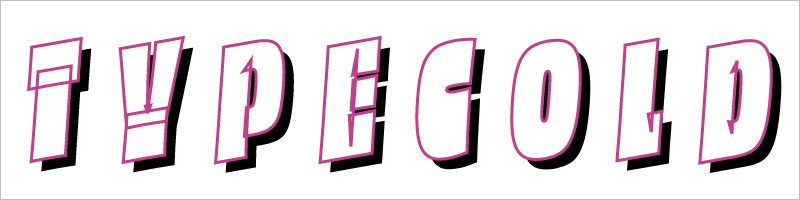

In [17]:
@renderable((800, 200))
def text_outline1(r):
    pens = (StSt("TYPECOLD", co, 150, wdth=0.5, rotate=10, tu=250)
        .align(r))

    return P(
        pens.copy().translate(10, -10).f(0),
        pens.f(1).s(hsl(0.9)).sw(3))

I’ll admit the impact of the interesting dropshadow here is lessened somewhat by the appearance of the strange pink lines in the top layer of text. When I added the code stroking the pens `(.s(hsl(0.9)).sw(3))`, I thought it would look like a standard stroked shape. But if you’re familiar with how variable fonts are constructed, those lines might not seem all that strange to you — they indicate that the letters are constructed in order to interpolate cleanly. That said, we probably don’t want to see them!

How to get rid of them? There are a couple options:

- There’s a special `ro=1` flag that you can pass to any `StSt` function, and that’ll (`r`)emove (`o`)verlaps on all the glyphs before they come back to you in their correct positions.


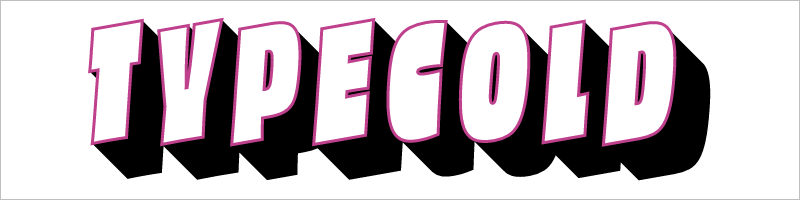

In [21]:
@renderable((800, 200))
def text_outline2(r):
    return (StSt("TYPECOLD", co, 150, wdth=0.5, rotate=10, tu=100, ro=1)
        .pen()
        .layer(
            lambda p: p.castshadow(-45, 50).f(0),
            lambda p: p.fssw(1, hsl(0.9), 3))
        .align(r, ty=1)) # ty=1 to use new contours of shadows for aligning (ty means "true-y", i.e. ignore the font metrics)

- Or you could call `removeOverlap` after you do the lockup, which would have the same effect.


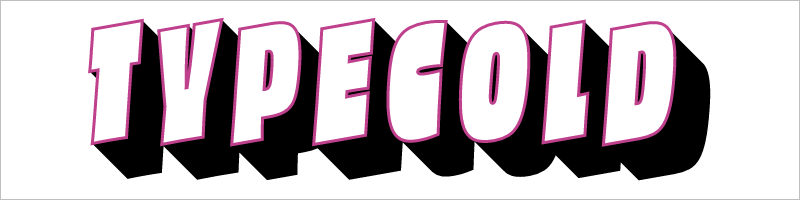

In [22]:
@renderable((800, 200))
def text_outline3(r):
    return (StSt("TYPECOLD", co, 150, wdth=0.5, rotate=10, tu=100)
        .pen()
        .removeOverlap()
        .layer(
            lambda p: p.castshadow(-45, 50).f(0),
            lambda p: p.fssw(1, hsl(0.9), 3))
        .align(r, ty=1))

Fixed! Also I did some completely unrelated things there.

- Instead of simply offsetting the main text to get a shadow, this example collapses the set of pens to a single pen (via `.pen()`), and then uses a built-in method called `castshadow(<angle>, <distance>)` to cast a shadow.

- Instead of copying anything, the example now uses the `.layer` method, which does the copying for you, and also removes the “original” in favor of the two lambda functions provided. Basically, this is a copy-and-replace operation, where we’ve provided two “replace” operations. So to recap: via `StSt`, we created a set of pens (aka vectors aka shapes), then we reduced that to a single pen, then we layered that pen, resulting in two new pens (one for the shadow, one for the filled and stroked shape on top). The layer function also allows us to directly return the “chain,” without having to declare intermediate variables.

One additional refinement you may want to make in an example like this is that you’d want to individually cast shadows based on a glyph + a little bit of stroke set around it, in the style of the 19th-century type designers. So let’s do that:


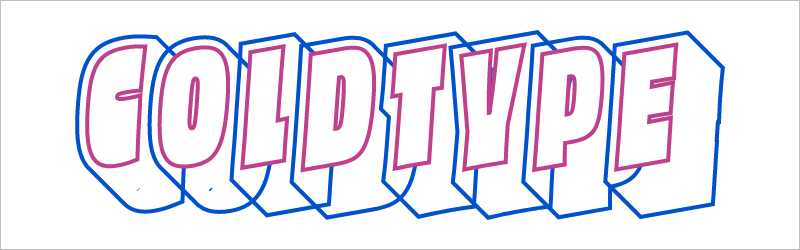

In [25]:
@renderable((800, 250))
def text_outline4(r):
    return (StSt("COLDTYPE", co, 150,
        wdth=0.5, rotate=10, tu=100, ro=1)
        .f(1)
        .layer(
            lambda ps: ps.mapv(lambda p: p
                .outline(10)
                .removeOverlap()
                .castshadow(-45, 50)
                .f(None)
                .s(hsl(0.6, s=1, l=0.4))
                .sw(4)),
            lambda ps: ps.s(hsl(0.9)).sw(4))
        .align(r, ty=1))

Dang, you know I thought that example would just work, but it looks like there are some tiny little dots present, which I think are artifacts of the `castshadow` call. I didn’t write the guts of that (Loïc Sander wrote something called a TranslationPen which is used by coldtype internally), so I don’t understand it completely, but it shouldn’t be difficult to devise a way to clean up those tiny specks by testing the `bounds` of each of the contours created by the `TranslationPen`. We can do that by iterating over the individual contours by `explode`ing the path into its constituent contours, then `filter`ing those contours, these `implode`ing those contours back into a single path again. We can also use the opportunity demonstrate some debugging techniques, like isolating a single letter and blowing it up.


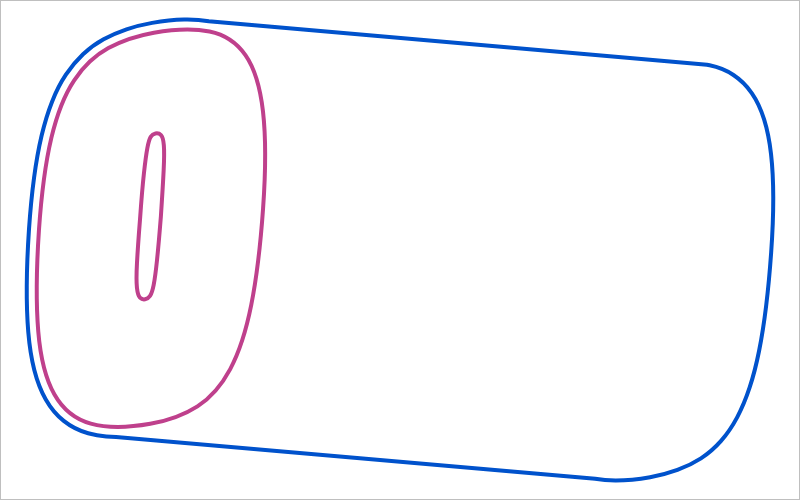

In [28]:
def shadow_and_clean(p):
    return (p
        .outline(10)
        .reverse()
        .remove_overlap()
        .castshadow(-5, 500)
        .explode()
        .filter(lambda j, c: c.bounds().w > 50)
        .implode()
        .f(None)
        .s(hsl(0.6, s=1, l=0.4))
        .sw(4))

@renderable((800, 500))
def text_outline5(r):
    return (StSt("O", co, 500,
        wdth=0.5, rotate=10, tu=100, ro=1)
        .f(1)
        .layer(
            lambda ps: ps.mapv(shadow_and_clean),
            lambda ps: ps.s(hsl(0.9)).sw(4))
        .align(r, ty=1))

Got it! If you comment out the `.explode/.filter/.implode` lines, you should see the little speck show up again.

N.B. We pulled the lambda being passed to mapv (map-values) out into its own function, `shadow_and_clean`. It’s not really a “reusable” function, but it is a little clearer in this instance to have that logic separated from the main chained expression.

Two suggestions to help you better understand code or find weird looks: try commenting out various stuff and using random colors.


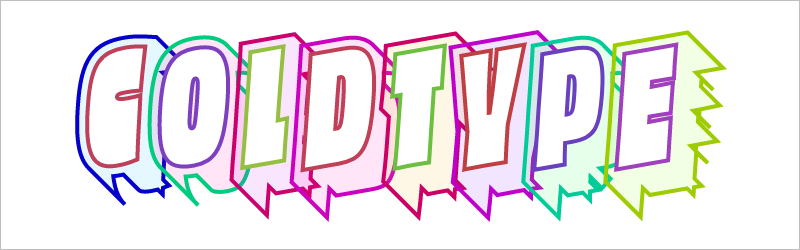

In [29]:
@renderable((800, 250))
def text_outline_random(r):
    return (StSt("COLDTYPE", co, 150,
        wdth=0.5, rotate=10, tu=100, ro=1)
        .f(1)
        .layer(
            lambda ps: ps.mapv(lambda p: p
                .outline(10)
                #.remove_overlap()
                .castshadow(-45, 50)
                .f(hsl(random(), s=1, a=0.1))
                .s(hsl(random(), s=1, l=0.4))
                .sw(4)),
            lambda ps: ps.mapv(lambda p: p
                .s(hsl(random())).sw(4)))
        .align(r, ty=1))

# Typography, further afield

## Multi-line text


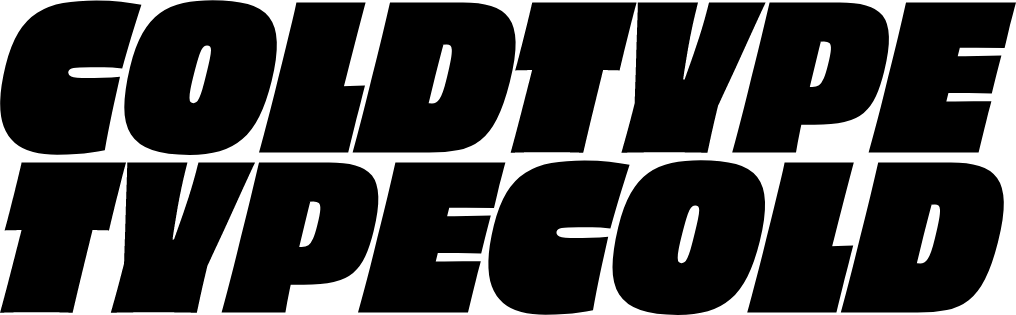

<®:P:/2...>

In [31]:
(StSt("COLDTYPE\nTYPECOLD", co, 200, wdth=1)
    .f(0))

## Multi-line text, fitted to width

Via the `fit=` kwarg


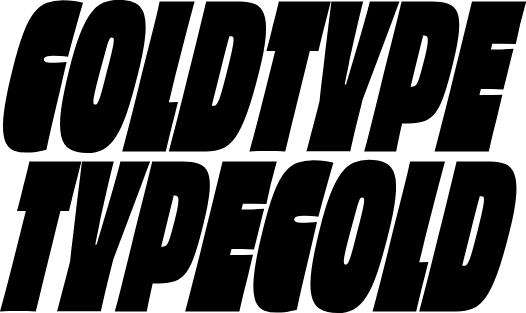

<®:P:/2...>

In [32]:
(StSt("COLDTYPE\nTYPECOLD", co, 200
    , wdth=1
    , fit=500)
    .f(0))

## Multi-line text, aligned right


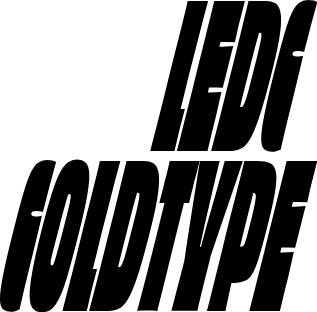

<®:P:/2...>

In [33]:
r1 = Rect(1000, 500)

(StSt("LEDC\nCOLDTYPE", co, 200, wdth=0)
    .xalign(r1, "E")
    .align(r1)
    .f(0))

## Text-on-a-path

If you’d like to align glyphs along an arbitrary path, you can use the DATPens’ `distribute_on_path` method to set the glyphs returned from a StSt.


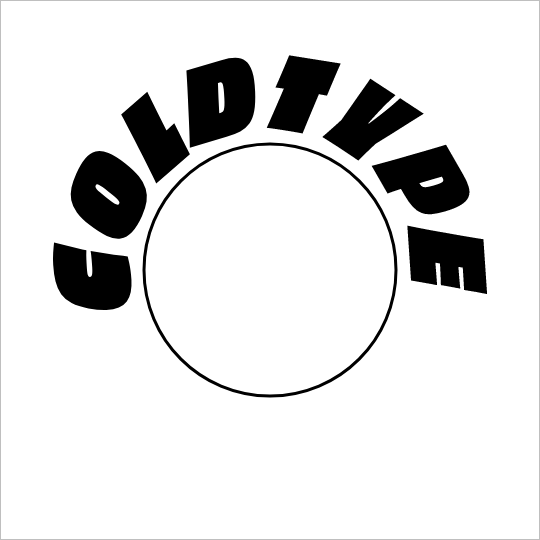

In [53]:
@renderable((540, 540))
def text_on_path1(r):
    circle = P().oval(r.inset(130)).reverse()

    txt = (StSt("COLDTYPE", co, 100, wdth=1)
        .distribute_on_path(circle, offset=180)
        .f(0))

    return (P(
        circle.scale(0.9).fssw(-1, 0, 3),
        txt)
        #.align(r)
        )

What if we want more text on the circle and we want it to fit automatically to the length of the curve on which it’s set — without overlapping? Simple append a fit= keyword argument to fit the text to the length of the curve that we’ll end up setting the pens on.


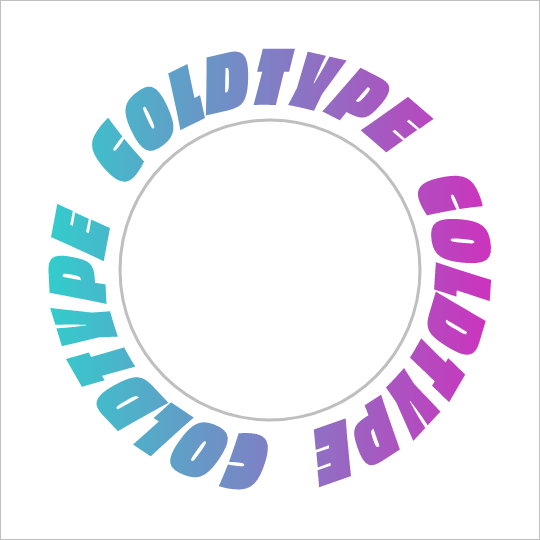

In [63]:
@renderable((540, 540))
def text_on_path2(r):
    circle = P().oval(r.inset(50)).reverse()

    return (StSt("COLDTYPE COLDTYPE COLDTYPE ", co, 100
        , wdth=1
        , tu=100
        , space=500
        , strip=False
        , fit=circle.length())
        .distribute_on_path(circle)
        .f(Gradient.H(circle.bounds(),
            hsl(0.5, s=0.6),
            hsl(0.85, s=0.6)))
        .insert(0,
            P().oval(r.inset(70)).fssw(-1, 0.75, 3))
        .scale(0.75, point=r.pc))

One thing that’s weird about setting text on a curve is that, depending on the curve, it can exaggerate — or eliminate — spacing between letters. Sometimes that doesn’t really matter — in the case of this circle, because the curve only bends in one manner, the text is always extra spacey, which usually isn’t a problem. But if we set the text on a sine-wave, the issue becomes more apparent, since the spacing is both expanded and compressed on the same curve, and when letters overlap excessively, they can get illegible quickly.

Is there a solution? Probably many but the one I like a lot is the understroke method on the DATPens class, which interleaves a stroked version of each letter in a set (a technique popular in pulp/comic titling & the subsequent graffiti styles they inspired).

Let’s see what that looks like.


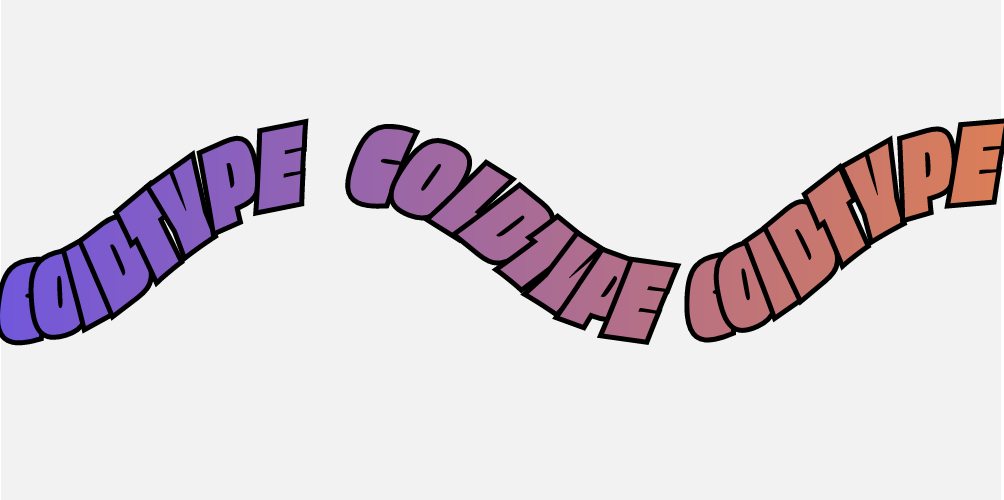

<®:P:/27...>

In [64]:
import coldtype.fx.shapes as shapes

r3 = Rect(1000, 500)
sine = P().ch(shapes.sine(r3.inset(0, 180), 3))

(StSt("COLDTYPE COLDTYPE COLDTYPE", co, 100
    , wdth=1
    , tu=-50
    , space=500
    , fit=sine.length()
    )
    .distribute_on_path(sine)
    .understroke(sw=10)
    .f(Gradient.H(sine.bounds(),
        hsl(0.7, l=0.6, s=0.65),
        hsl(0.05, l=0.6, s=0.65)))
    .translate(0, -20)
    .insert(0, P(r3).f(0.95)))

Interesting! But there’s one thing to correct if we want better legibility. You’ll notice in that first purple COLDTYPE, the C is unrecognizable, because the O that comes after it is on top of it. This is how text layout engines usually work for LTR languages — the topmost glyph is the right-most glyph. But that’s not what we want — we want to reverse the order of the glyphs. Luckily, that’s easy, just pass a r=1 (or reverse=1), to the Style constructor.


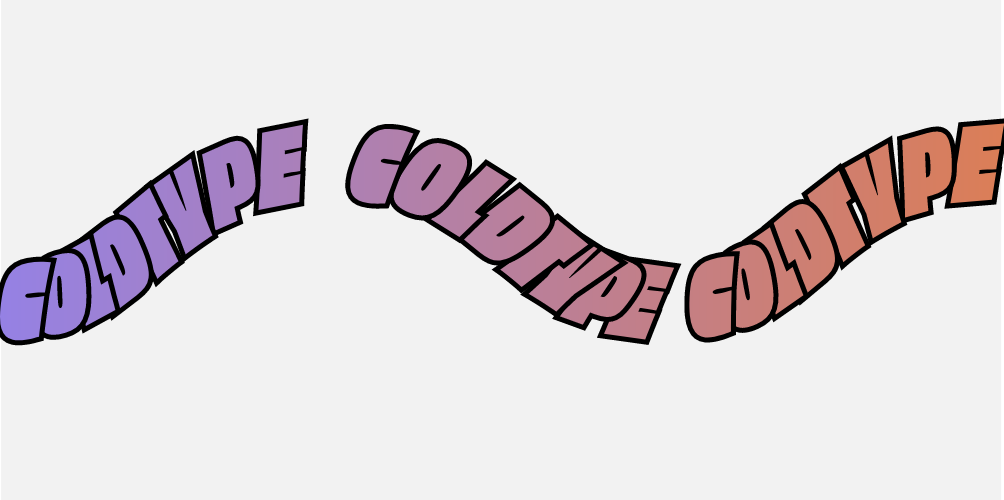

<®:P:/27...>

In [65]:
sine = P().ch(shapes.sine(r3.inset(0, 180), 3))

(StSt("COLDTYPE COLDTYPE COLDTYPE", co, 100
    , wdth=1
    , tu=-50
    , space=500
    , r=1
    , fit=sine.length()
    )
    .distribute_on_path(sine)
    .understroke(sw=10)
    .f(Gradient.H(sine.bounds(),
        hsl(0.7, l=0.7, s=0.65),
        hsl(0.05, l=0.6, s=0.65)))
    .translate(0, -20)
    .insert(0, P(r3).f(0.95)))

It’s a subtle change, but one that (to me) makes a huge difference. I also lightened the purple in the gradient, I think it looks a little better that way, right?

